In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Preparazione Dati

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


possiamo notare che tutti i nomi delle colonne iniziano con la lettera maiuscola, riduciamo tutto in minuscolo

In [4]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Si può notare che il DataFrame ha le seguenti colonne:
- stato: se il cliente è riuscito a rimborsare il prestito (1) o meno (2)
- anzianità: esperienza lavorativa in anni
- casa: tipo di abitazione: in affitto (1), proprietario di una casa (2) e altro
- tempo: periodo previsto per il prestito (in mesi)
- età: età del cliente
- stato civile: celibe (1), coniugato (2) e altro
- record: se il cliente ha dei record precedenti: no (1), sì (2)
- lavoro: tipo di lavoro: a tempo pieno (1), a tempo parziale (2) e altro
- spese: quanto spende il cliente al mese
- reddito: quanto guadagna il cliente al mese
- attività: valore totale di tutte le attività del cliente
- debito: importo del debito creditizio
- importo: importo richiesto del prestito
- prezzo: prezzo di un articolo che il cliente vuole acquistare

Sebbene la maggior parte delle colonne sia numerica, alcune sono categoriche: stato, casa, stato civile, record e lavoro. I valori che vediamo nel DataFrame, tuttavia, sono numeri, non stringhe. Ciò significa che dobbiamo tradurli con i loro nomi reali.

Possiamo usare map per convertire i numeri in stringhe. A tale scopo, si definisce prima il dizionario con la mappatura dal valore corrente (numero) al valore desiderato (stringa):

In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


Ripetiamo la stessa procedura per tutte le altre colonne

In [6]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,1,1,1,46,107,0,0,310,910


In [7]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [8]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [9]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


Tutte le variabili categoriche sono stringhe, non numeri.

Come passo successivo, diamo un'occhiata alle colonne numeriche. Per prima cosa, controlliamo le statistiche di riepilogo per ciascuna colonna:

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


99999999 indicano valori mancanti, tre colonne presentano questo problema: reddito, patrimonio e debito. Sostituiamo questo numero con NaN:

In [12]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [13]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Ora le statistiche sono più significative

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Osserviamo la variabile principale (status)

In [15]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

C'è un record il cui stato è sconosciuto. Rimuoviamolo

In [16]:
df = df[df.status != 'unk']

In [17]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Ora siamo pronti a preparare i dati per l'addestramento:

* Dividere il set di dati per l'addestramento, validazione e test.
* Gestione dei valori mancanti.
* Utilizzare la one-hot encoding per codificare le variabili categoriche.
* Creare la matrice di caratteristiche X e la variabile target y. 

Cominciamo a dividere i dati. Divideremo i dati in tre parti:
* Dati di addestramento (60% del dataset originale)
* Dati di convalida (20%)
* Dati per il test (20%)

Poiché non possiamo dividere i dati in tre insiemi contemporaneamente, dovremo dividerli due volte. Per prima cosa terremo il 20% dei dati per i test e poi divideremo il restante 80% in addestramento e validazione.
Quando si divide per la seconda volta, si mette da parte il 25% dei dati invece del 20% (test_ size=0,25). Poiché df_train_full contiene l'80% dei record, un quarto (cioè il 25%) dell'80% corrisponde al 20% del dataset originale.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [20]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

Rimuoviamo lo stato dai DataFrames:

In [21]:
del df_train['status']
del df_val['status']

Per verificare la dimensione dei nostri set di dati, possiamo usare la funzione len

In [22]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

Per utilizzare le variabili categoriche, è necessario codificarle. Applichiamo la tecnica di one-hot encoding. Nella codifica ogni valore è codificato come "1" se è presente o "0" se è assente.

In [23]:
from sklearn.feature_extraction import DictVectorizer

Ricordiamo che ci sono alcuni valori mancanti:

In [24]:
df_train.isnull().sum()

seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

Li sostituiremo con "0" e DictVectorizer ha bisogno di un elenco di dizionari, quindi dobbiamo convertire i DataFrames in questo formato:

In [25]:
dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')

Vediamo il primo record di dict_train:

In [26]:
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

ora essere usato come input per DictVectorizer:

In [27]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

Ora siamo pronti ad addestrare un modello. Inizieremo con gli alberi decisionali

## Alberi decisionali
Utilizzeremo DecisionTreeClassifier e per valutare la qualità dei nostri modelli utiliziamo AUC (Area under the ROC Curve)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

Usiamo i parametri predefiniti

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

E sulla convalida:

In [31]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6583335351529389

Si tratta di un caso di _overfitting_: il nostro modello sui dati di training funziona perfettamente, ma fallisce nella validazione.

Cambiamo il parametro della profondità: riportiamo la dimensione dell'albero a 2 livelli:

In [32]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


È ancora meglio dell'albero precedente.

### Regolazione dei parametri per l'albero decisionale
Cerchiamo il miglior set di parametri modificando il modello e verificando il suo punteggio sul validation dataset. Alla fine, si utilizza il modello con il miglior punteggio.

Possiamo mettere a punto due parametri:
- max_depth
- min_leaf_size
Questi due sono i più importanti, quindi regoleremo solo quelli.

In [33]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [34]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [35]:
roc_auc_score(y_val, y_pred)

0.7600869438860769

In [36]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.751
  10 -> 0.690
  15 -> 0.664
  20 -> 0.662
None -> 0.667


Vediamo che max_depth di 5 fornisce la migliore AUC (76,6%), seguita da 4 e 6 
Quindi, mettiamo a punto min_leaf_size. A tal fine, iteriamo sui tre migliori parametri di max_depth e, per ognuno, esaminiamo diversi valori di min_leaf_size:

In [37]:
for m in [4, 5, 6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.750
5 -> 0.762
10 -> 0.778
15 -> 0.785
20 -> 0.773
50 -> 0.770
100 -> 0.776
200 -> 0.768



Vediamo che la migliore AUC è del 78,5% con i parametri min_sample_ leaf=15 e max_depth=6

In [38]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.750
5 -> 0.759
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768


In [39]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.785470804775859

In [40]:
from sklearn.metrics import roc_curve

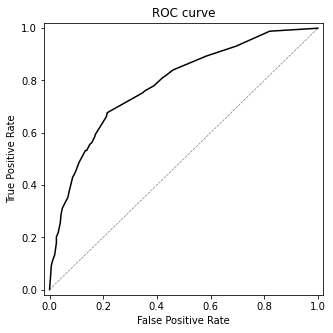

In [41]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7865121939405681

Se lo ripetiamo un'altra volta, la situazione cambia:

In [44]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7887705553268267

Per capire quanto cambia, possiamo ripeterlo 100 volte e osservare la media e la deviazione standard.

In [45]:
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.784 +- 0.010
0.774 -- 0.794


Il motivo è la randomizzazione: per addestrare un albero, selezioniamo casualmente un sottoinsieme di caratteristiche. Per rendere i risultati coerenti, dobbiamo fissare il seed del generatore di numeri casuali, assegnando un valore al parametro random_state

In [46]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

Questa volta otteniamo un AUC del 78%. Questo punteggio non cambia, indipendentemente dal numero di riqualificazioni del modello.
Ora verifichiamo come l'AUC dipende dal numero di alberi

In [47]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.815
50 -> 0.816
60 -> 0.817
70 -> 0.818
80 -> 0.818
90 -> 0.820
100 -> 0.819
110 -> 0.819
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.820
160 -> 0.820
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.820


In questo codice, proviamo diversi numeri di alberi: da 10 a 200, procedendo per passi di 10 (10, 20, 30, ...). Ogni volta che addestriamo un modello, calcoliamo la sua AUC sul set di validazione e la registriamo.
Al termine, possiamo tracciare i risultati:

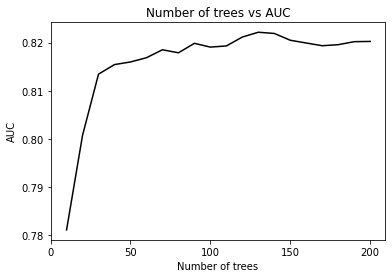

In [48]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

### Regolazione dei parametri per la foresta casuale
I parametri più importanti da mettere a punto per le foreste casuali sono:
- max_depth
- min_leaf_size

Proviamo alcuni valori di max_depth e vediamo come si evolve l'AUC al crescere del numero di alberi

In [49]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()
    

depth: 5
10 -> 0.788
20 -> 0.798
30 -> 0.800
40 -> 0.800
50 -> 0.800
60 -> 0.801
70 -> 0.802
80 -> 0.803
90 -> 0.804
100 -> 0.804
110 -> 0.807
120 -> 0.806
130 -> 0.808
140 -> 0.807
150 -> 0.807
160 -> 0.807
170 -> 0.807
180 -> 0.807
190 -> 0.807
200 -> 0.807

depth: 10
10 -> 0.791
20 -> 0.808
30 -> 0.812
40 -> 0.818
50 -> 0.817
60 -> 0.819
70 -> 0.820
80 -> 0.820
90 -> 0.820
100 -> 0.821
110 -> 0.823
120 -> 0.823
130 -> 0.825
140 -> 0.824
150 -> 0.824
160 -> 0.825
170 -> 0.825
180 -> 0.825
190 -> 0.825
200 -> 0.825

depth: 20
10 -> 0.776
20 -> 0.803
30 -> 0.813
40 -> 0.817
50 -> 0.815
60 -> 0.813
70 -> 0.814
80 -> 0.815
90 -> 0.814
100 -> 0.815
110 -> 0.817
120 -> 0.816
130 -> 0.818
140 -> 0.818
150 -> 0.818
160 -> 0.818
170 -> 0.817
180 -> 0.817
190 -> 0.817
200 -> 0.818



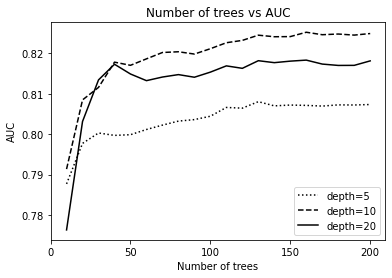

In [50]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

Con max_depth=10, l'AUC supera l'82%, mentre per altri valori le prestazioni sono peggiori.
Ora mettiamo a punto min_samples_leaf. Impostiamo il valore del parametro max_depth dal passo precedente e poi seguiamo lo stesso approccio precedente per determinare il valore migliore per min_samples_leaf:

In [51]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.811
30 -> 0.823
50 -> 0.823
70 -> 0.822
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825

min_samples_leaf: 5
10 -> 0.813
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.822
110 -> 0.825
130 -> 0.825
150 -> 0.825
170 -> 0.825
190 -> 0.826

min_samples_leaf: 10
10 -> 0.810
30 -> 0.822
50 -> 0.822
70 -> 0.819
90 -> 0.820
110 -> 0.820
130 -> 0.821
150 -> 0.820
170 -> 0.820
190 -> 0.820



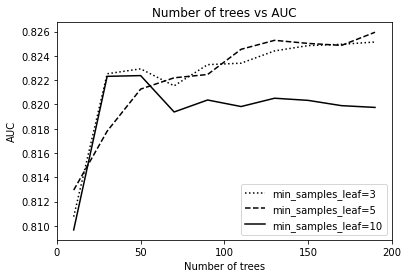

In [52]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

Vediamo che l'AUC è leggermente migliore per valori piccoli di min_samples_leaf e il valore migliore è 5.
Pertanto, i parametri migliori per la foresta casuale per il nostro problema sono
- max_depth=10
- min_samples_leaf=5

Abbiamo ottenuto la migliore AUC con 200 alberi, quindi dobbiamo impostare il parametro n_estimators a 200.
Formiamo il modello finale:


In [53]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [54]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8253826499721489

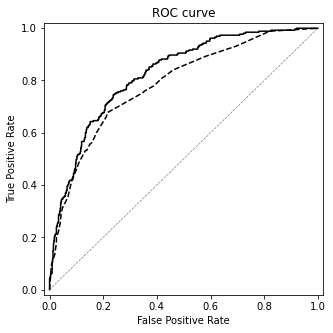

In [55]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## XGBoost

In [56]:
import xgboost as xgb

Prima di poter addestrare un modello XGBoost, dobbiamo inserire i nostri dati in DMatrix, una struttura di dati speciale per trovare in modo efficiente le suddivisioni.
Quando si crea un'istanza di DMatrix, si passano tre parametri:
- X_train: la matrice delle caratteristiche
- y_train: la variabile target
- nomi_caratteristiche: i nomi delle caratteristiche in X_train

Procediamo allo stesso modo per il set di dati di convalida



In [57]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

Il passo successivo consiste nello specificare i parametri per l'addestramento.

In [58]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

Iniziamo con 10 alberi e inseriamo tre argomenti per l'addestramento:
- xgb_params: i parametri per la formazione
- dtrain: l'insieme di dati per l'addestramento (un'istanza di DMatrix).
- num_boost_round=10: il numero di alberi da addestrare


In [59]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

Per valutarlo, dobbiamo fare una previsione sul set di dati di validazione. 

In [60]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

calcoliamo l'AUC utilizzando lo stesso approccio precedente:

In [61]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

Si tratta di un risultato abbastanza buono (81,5%), ma è ancora leggermente peggiore del nostro miglior modello di foresta casuale (82,5%).

Per avere un'idea di come cambia l'AUC al crescere del numero di alberi, possiamo utilizzare una watchlist, una funzione integrata in XGBoost per monitorare le prestazioni del modello.
Una watchlist è un elenco Python con tuple. Ogni tupla contiene una matrice DM e il suo nome. 

In [62]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

Inoltre, modifichiamo l'elenco dei parametri per l'addestramento: dobbiamo specificare la metrica che utilizziamo per la valutazione. Nel nostro caso, si tratta dell'AUC:

In [63]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

Per utilizzare la watchlist durante l'addestramento, è necessario specificare due argomenti aggiuntivi:
- evals: la lista di controllo.
- verbose_eval: la frequenza di print della metrica. Se si imposta "10", si vedrà il risultato dopo ogni 10° passo.


In [64]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.95002	val-auc:0.81558
[20]	train-auc:0.97316	val-auc:0.81775
[30]	train-auc:0.98772	val-auc:0.81787
[40]	train-auc:0.99456	val-auc:0.81387
[50]	train-auc:0.99688	val-auc:0.81128
[60]	train-auc:0.99889	val-auc:0.80801
[70]	train-auc:0.99944	val-auc:0.80732
[80]	train-auc:0.99985	val-auc:0.80677
[90]	train-auc:0.99992	val-auc:0.80637
[99]	train-auc:0.99998	val-auc:0.80546


Per acquisire questo output, si può usare l'istruzione
- `%%capture` che salva il risultato nell'output
- la funzione `parse_xgb_output`, che lo analizza

In [65]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [66]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

Utilizziamolo per tracciare i punteggi

In [67]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

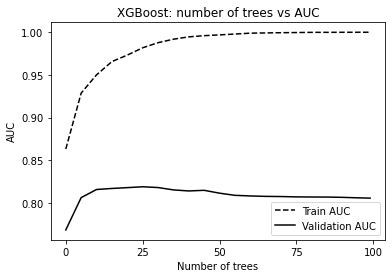

In [68]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

Al crescere del numero di alberi, il punteggio sul training set aumenta

Questo comportamento è atteso nel boosting, ogni modello successivo cerca di correggere gli errori del passo precedente, quindi il punteggio migliora sempre.
Per il punteggio di convalida, invece, non è così. Inizialmente aumenta, ma poi inizia a diminuire. Questo è l'effetto dell'overfitting: il nostro modello diventa sempre più complesso fino a memorizzare l'intero set di allenamento.
Otteniamo la migliore AUC alla 30a iterazione (81,7%), ma non è molto diversa da quella ottenuta alla 10a iterazione (81,5%).


## Regolazione dei parametri per XGBoost

Ci interessano tre parametri:
- eta: Tasso di apprendimento.
- max_depth: La profondità massima consentita di ogni albero
- min_child_weight: Il numero minimo di osservazioni in ogni gruppo

### Parameter tuning: eta

Per prima cosa, impostiamo eta a 0,3

In [69]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [70]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.81787
(0.81787, 30)


impostiamo eta a 0,1

In [71]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [72]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.82477
(0.82477, 70)


impostiamo eta a 0,05

In [73]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [74]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.82297
(0.82297, 120)


impostiamo eta a 0,01

In [75]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [76]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.82168
(0.82168, 499)


### Confrontiamo i risultati

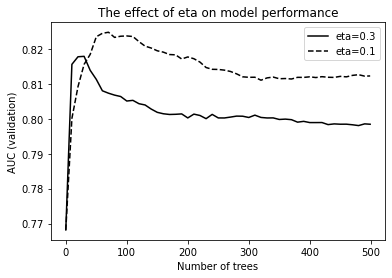

In [77]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

plt.show()

Quando eta è pari a 0,3, si ottiene abbastanza rapidamente la migliore AUC, ma poi inizia un overfit. Dopo la trentesima iterazione, le prestazioni sull'insieme di validazione diminuiscono.
Quando eta è 0,1, l'AUC cresce più lentamente ma raggiunge un picco più alto. Con un tasso di apprendimento minore, occorrono più alberi per raggiungere il picco, ma si possono ottenere prestazioni migliori.


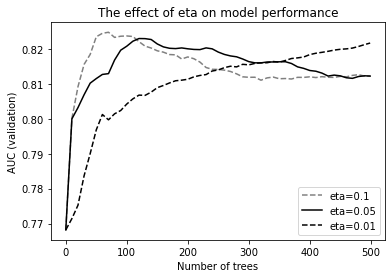

In [78]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

plt.show()

Quando eta è 0,05, le prestazioni sono simili a quelle di 0,1, ma sono necessarie 60 iterazioni in più per raggiungere il picco.
Per un eta di 0,01, cresce troppo lentamente e anche dopo 500 iterazioni non ha raggiunto il picco.
Utilizziamo il valore 0,1 per eta. 


### Parameter tuning: max_depth

Il valore predifinito è 6, proviamo con un valore inferiore (3) e uno superiore (10)

Impostiamo max_depth a 3:

In [79]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [80]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.83657
(0.83657, 180)


Ora, impostiamo max_depth a 10

In [81]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [82]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.81878
(0.81169, 100)


Con max_depth=3 è migliore di max_depth=6 e max_depth=10. Quindi proviamo con 4 per vedere se è meglio di 3

Imposto max_depth=4

In [83]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [84]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)
print(max(aucs_val_depth4))
print(max(zip(aucs_val_depth4, tree)))

0.83014
(0.83014, 80)


é leggermente peggiore di max_depth=3 che è di 0.83657

### Confronto grafico dei risultati

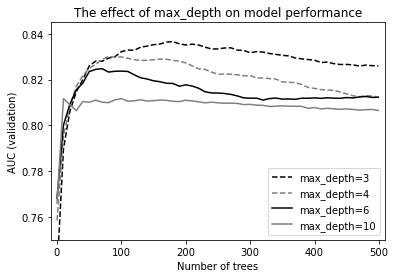

In [85]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth4, color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

plt.show()

max_depth=3 risulta essere il migliore

### Tune "min_child_weight"

Innanzitutto, il valore predefinito:

In [86]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [87]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.83657
(0.83657, 180)


imposto min_child_weight=10

In [88]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [89]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.83336
(0.83336, 150)


imposto min_child_weight=30

In [90]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [91]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.83543
(0.83543, 160)


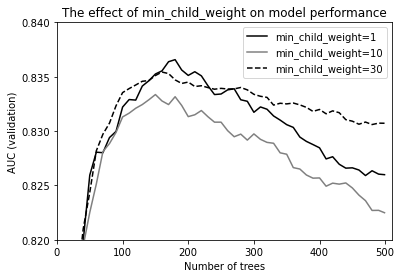

In [92]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

plt.show()

Il valore ottimale per min_child_weight è 1, ma non è molto diverso dagli altri valori:
- Per min_child_weight=1, l'AUC è dell'83,6%.
- Per min_child_weight=10, l'AUC è dell'83,3%.
- Per min_child_weight=30, l'AUC è dell'83,5%.


## Verifica del numero ottimale di alberi

I parametri del nostro modello finale sono:
- eta=0,1
- max_depth=3
- min_child_weight=1

dobbiamo selezionare il numero ottimale di alberi. Guardiamo l'iterazione in cui il punteggio di validazione ha raggiunto il massimo e usiamo questo numero.

In [93]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [94]:
print(output)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82806
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[180]	train-auc:0.93971	val-auc:0.83657
[190]	train-auc:0.94203	val-auc:0.83562
[200]	train-auc:0.94334	val-auc:0.83512
[210]	train-auc:0.94501	val-auc:0.83546
[220]	train-auc:0.94693	val-auc:0.83508
[230]	train-auc:0.94839	val-auc:0.83417
[240]	train-auc:0.94999	val-auc:0.83336
[250]	train

Il massimo punteggio di validazione:

In [95]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.83657


troviamo il numero di alberi associato:

In [96]:
max(zip(aucs_val, tree))

(0.83657, 180)

Troviamo come risultato 180 numero di alberi 

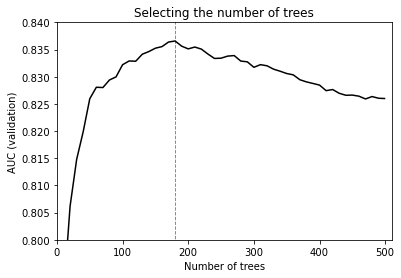

In [97]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(180, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

plt.show()

### Modelli a confronto

Modello XGBoost con i parametri ottimali:

In [98]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=180, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82806
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[179]	train-auc:0.93962	val-auc:0.83648


In [99]:
y_pred_xgb = model.predict(dval)

In [100]:
roc_auc_score(y_val, y_pred_xgb)

0.8364807100821002

In [101]:
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_rf))
print(roc_auc_score(y_val, y_pred_xgb))

0.785470804775859
0.8253826499721489
0.8364807100821002


### Risultato
Il modello random forest è riuscito a ottenere l'82,5% di AUC, mentre il modello XGBoost ha ottenuto l'1% in più (83,6%).
Questo è il modello migliore, quindi lo usiamo come modello finale e dovremmo usarlo per valutare le richieste di prestito.


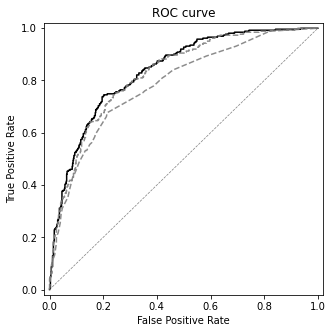

In [102]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Test finale
Siamo quasi pronti a usarlo per il risk scoring. Dobbiamo ancora fare due cose prima di poterlo utilizzare:
- Riaddestrare il modello finale su entrambi i set di dati di addestramento e di convalida combinati. Non abbiamo più bisogno del set di dati di convalida, quindi possiamo usare più dati per l'addestramento, il che renderà il modello leggermente migliore.
- Testare il modello sul set di test. Si tratta della parte di dati che abbiamo tenuto da parte fin dall'inizio. Ora la usiamo per assicurarci che il modello non si sia adattato troppo e che funzioni bene su dati completamente sconosciuti.

Le fasi successive sono:
- Applicare a df_full_train e df_test la stessa pre-elaborazione che abbiamo fatto per df_train e df_val. Si ottengono così le matrici di caratteristiche X_train e X_test e le variabili target y_train e y_test.
- Addestrare un modello sul set di dati combinato con i parametri selezionati in precedenza.
- Applicare il modello ai dati di prova per ottenere le previsioni di prova.
- Verificare che il modello funzioni bene e non si adatti eccessivamente.

Per prima cosa, creiamo la variabile target:


In [103]:
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

Convertiamo i DataFrames in elenchi di dizionari e utiliziamo one-hot encoding per ottenere le matrici di caratteristiche:

In [110]:
dict_train_full = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

Addestriamo il modello XGBoost utilizzando questi dati e i parametri ottimali determinati in precedenza:

In [111]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 160

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

In [112]:
y_pred_xgb = xgb_final.predict(dtest)

In [113]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.8241777039245393
0.8322845901959826


Il risultato è dell'83,2%, paragonabile all'83,6% della performance sul set di validazione. Ciò significa che il nostro modello non si adatta eccessivamente e può lavorare bene con clienti che non ha mai visto.